<a href="https://colab.research.google.com/github/Devraj02-sys/AI-ML-project/blob/main/Global_Housing_Market_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
# prompt: Write a code to load CSV file

import pandas as pd

# Replace 'your_file.csv' with the actual name of your CSV file
file_path = '/content/dataset/global_housing_market_extended.csv'

try:
  # Load the CSV file into a pandas DataFrame
  global_housing_market_extended = pd.read_csv("/content/dataset/global_housing_market_extended.csv")

  # Print the first few rows of the DataFrame to verify
  print(global_housing_market_extended.head())
  print(global_housing_market_extended.columns)
  # print(global_housing_market_extended.tail())


except FileNotFoundError:
  print(f"Error: File  not found.")



  Country  Year  House Price Index  Rent Index  Affordability Ratio  \
0     USA  2015         117.454012  116.550001             9.587945   
1     USA  2016         150.807258   51.440915            11.729189   
2     USA  2017         123.194502   70.386040             8.506676   
3     USA  2018         131.423444   91.469020             3.418054   
4     USA  2019         110.461377   56.837048             9.158097   

   Mortgage Rate (%)  Inflation Rate (%)  GDP Growth (%)  \
0           4.493292            1.514121       -0.752044   
1           5.662213            1.880204       -0.545400   
2           2.197469            2.398940        0.930895   
3           4.537724            1.608407       -1.479587   
4           3.700762            1.293249        1.961415   

   Population Growth (%)  Urbanization Rate (%)  Construction Index  
0              -0.796707              85.985284          118.089201  
1              -0.358084              69.127267          111.980515  
2 

<Axes: xlabel='Country', ylabel='House Price Index'>

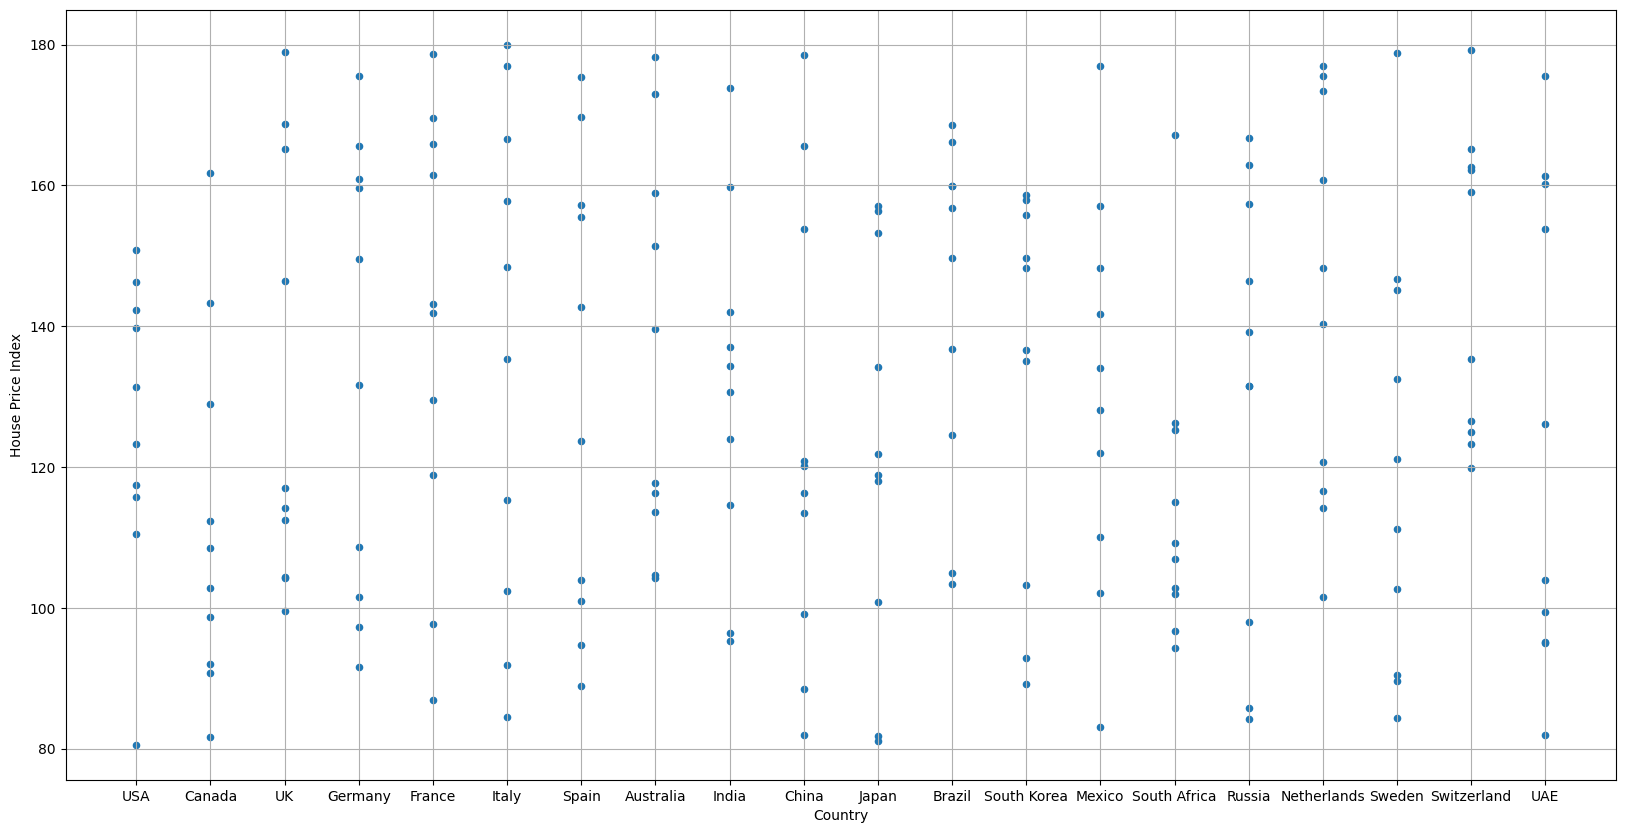

In [26]:
# prompt: Visualise data

import matplotlib.pyplot as plt
import seaborn as sns

global_housing_market_extended.plot(x='Country', y='House Price Index', kind='scatter',grid=True, figsize=(20,10))

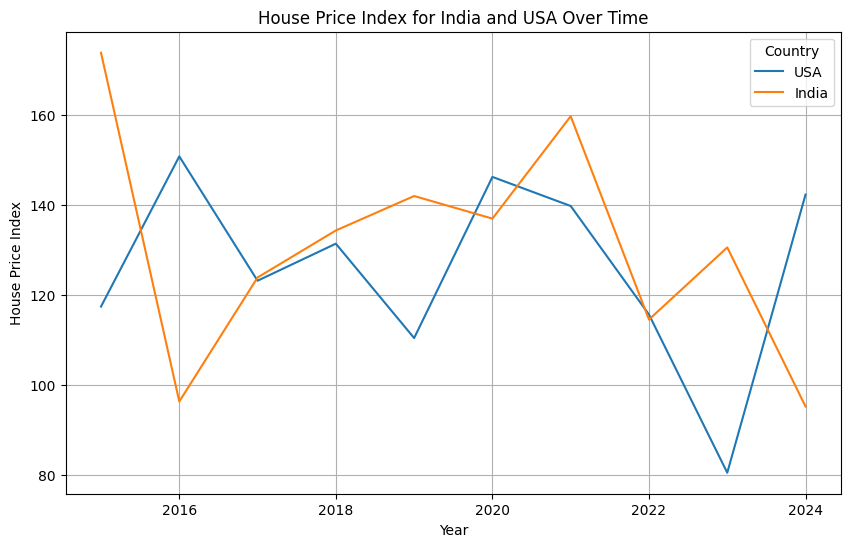

In [28]:
# prompt: Visualise only India And Usa House price Index and the year

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataframe is named 'global_housing_market_extended'

# Filter data for India and USA
india_usa_data = global_housing_market_extended[global_housing_market_extended['Country'].isin(['India', 'USA'])]

# Create the plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.lineplot(x='Year', y='House Price Index', hue='Country', data=india_usa_data)
plt.title('House Price Index for India and USA Over Time')
plt.xlabel('Year')
plt.ylabel('House Price Index')
plt.grid(True)
plt.show()


In [49]:
# prompt: Create a Train and test Data

from sklearn.model_selection import train_test_split

# Assuming your target variable is 'House Price Index'
X = global_housing_market_extended.drop('House Price Index', axis=1)
y = global_housing_market_extended['House Price Index']

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #random_state for reproducibility

# Now you have X_train, X_test, y_train, and y_test for your machine learning model
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (160, 10)
X_test shape: (40, 10)
y_train shape: (160,)
y_test shape: (40,)


In [46]:
# prompt: Create a pipeline that have hyperparameter as Simple Imputer,Mix_MaxScale ,One hot Encoder And  Standard Scaler And RBF kernal use Linear Regression  and check the prediction with new instance Country

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR

# ... (Your existing code for data loading and preprocessing) ...

# Define features (X) and target variable (y)
X = global_housing_market_extended[['Year', 'Country', ]] # Example features
y = global_housing_market_extended['House Price Index']

# Identify numerical and categorical features
numerical_features = ['Year']
categorical_features = ['Country']

# Create transformers for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])


categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])


# Create the main pipeline with SVR
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', SVR(kernel='rbf'))  # Use SVR with RBF kernel
])


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the pipeline
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Example prediction for a new instance
new_instance = pd.DataFrame({'Year': [2024], 'Country': ['USA'], }) #Replace with actual values
new_prediction = pipeline.predict(new_instance)
print(f"Predicted House Price Index for new instance: {new_prediction}")


Mean Squared Error: 932.8981043965475
Predicted House Price Index for new instance: [129.65212617]
